In [ ]:
%pylab inline 
import numpy as np
import pandas as pd
from scipy import linalg
from sklearn import tree
from itertools import combinations
import scipy
import scipy.io as io
from scipy.io import mmread
import scipy.sparse as sparse
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$
# Homework 4
## Homework guideline
- The deadline is Nov 16th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation. If you use latex command in the markdown, **2 points** bonus will be awarded.   

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point. 


- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

**Collaboration:** List the names of all people you collaborated with and for which question(s). This is important!

# Q1: Gaussian Mixture Models (50pt)
### Q1.1  KL divergence (10pt)
In class, we defined the **Kullback-Leibler divergence** (or **KL divergence** for short) between two probability distributions $q$ and $p$, 
$$ \text{KL}(q||p)=\sum_{z=1}^K q(z) \log\left( \frac{q(z)}{p(z)}\right)$$
where $\sum_{z=1}^K q(z)=1$ and $\sum_{z=1}^K p(z)=1$. For simplicity, assume $p(z)>0$ for all $z$. 

Please show the following two key properties
- $\text{KL}(q||p)\ge 0$ 

- $\text{KL}(q||p)=0$ iff $p=q$. 

# Your Solution: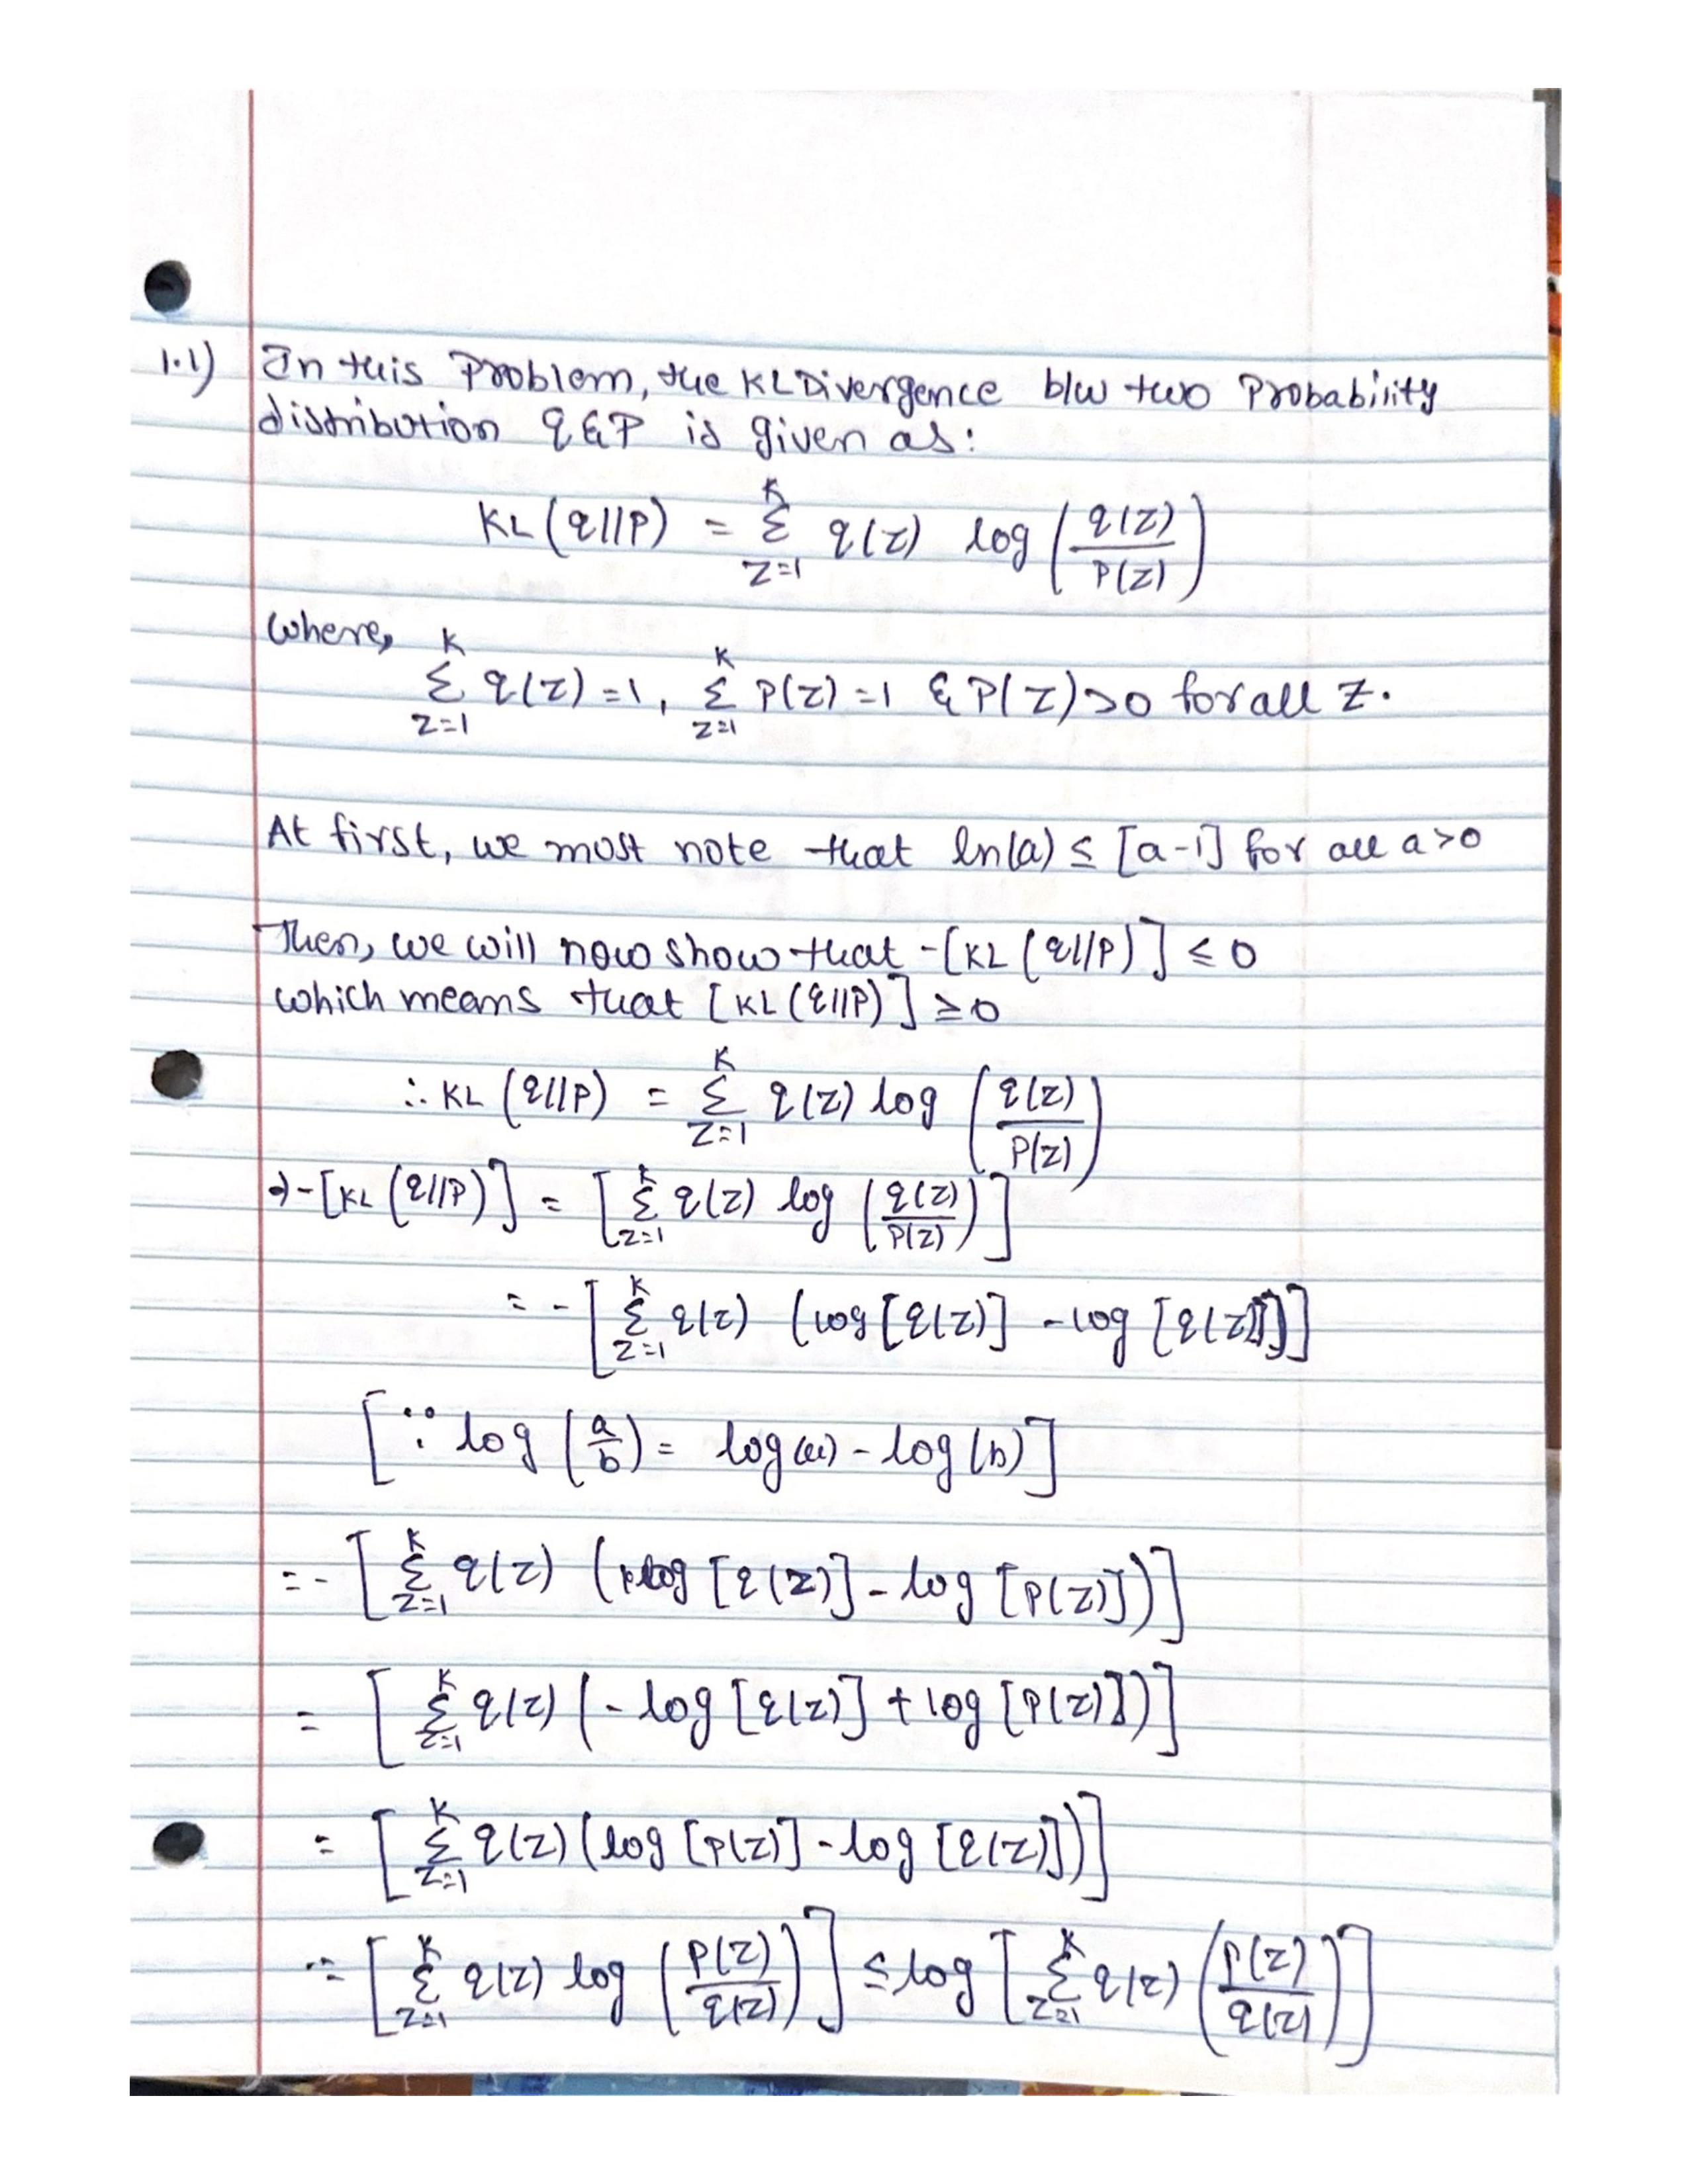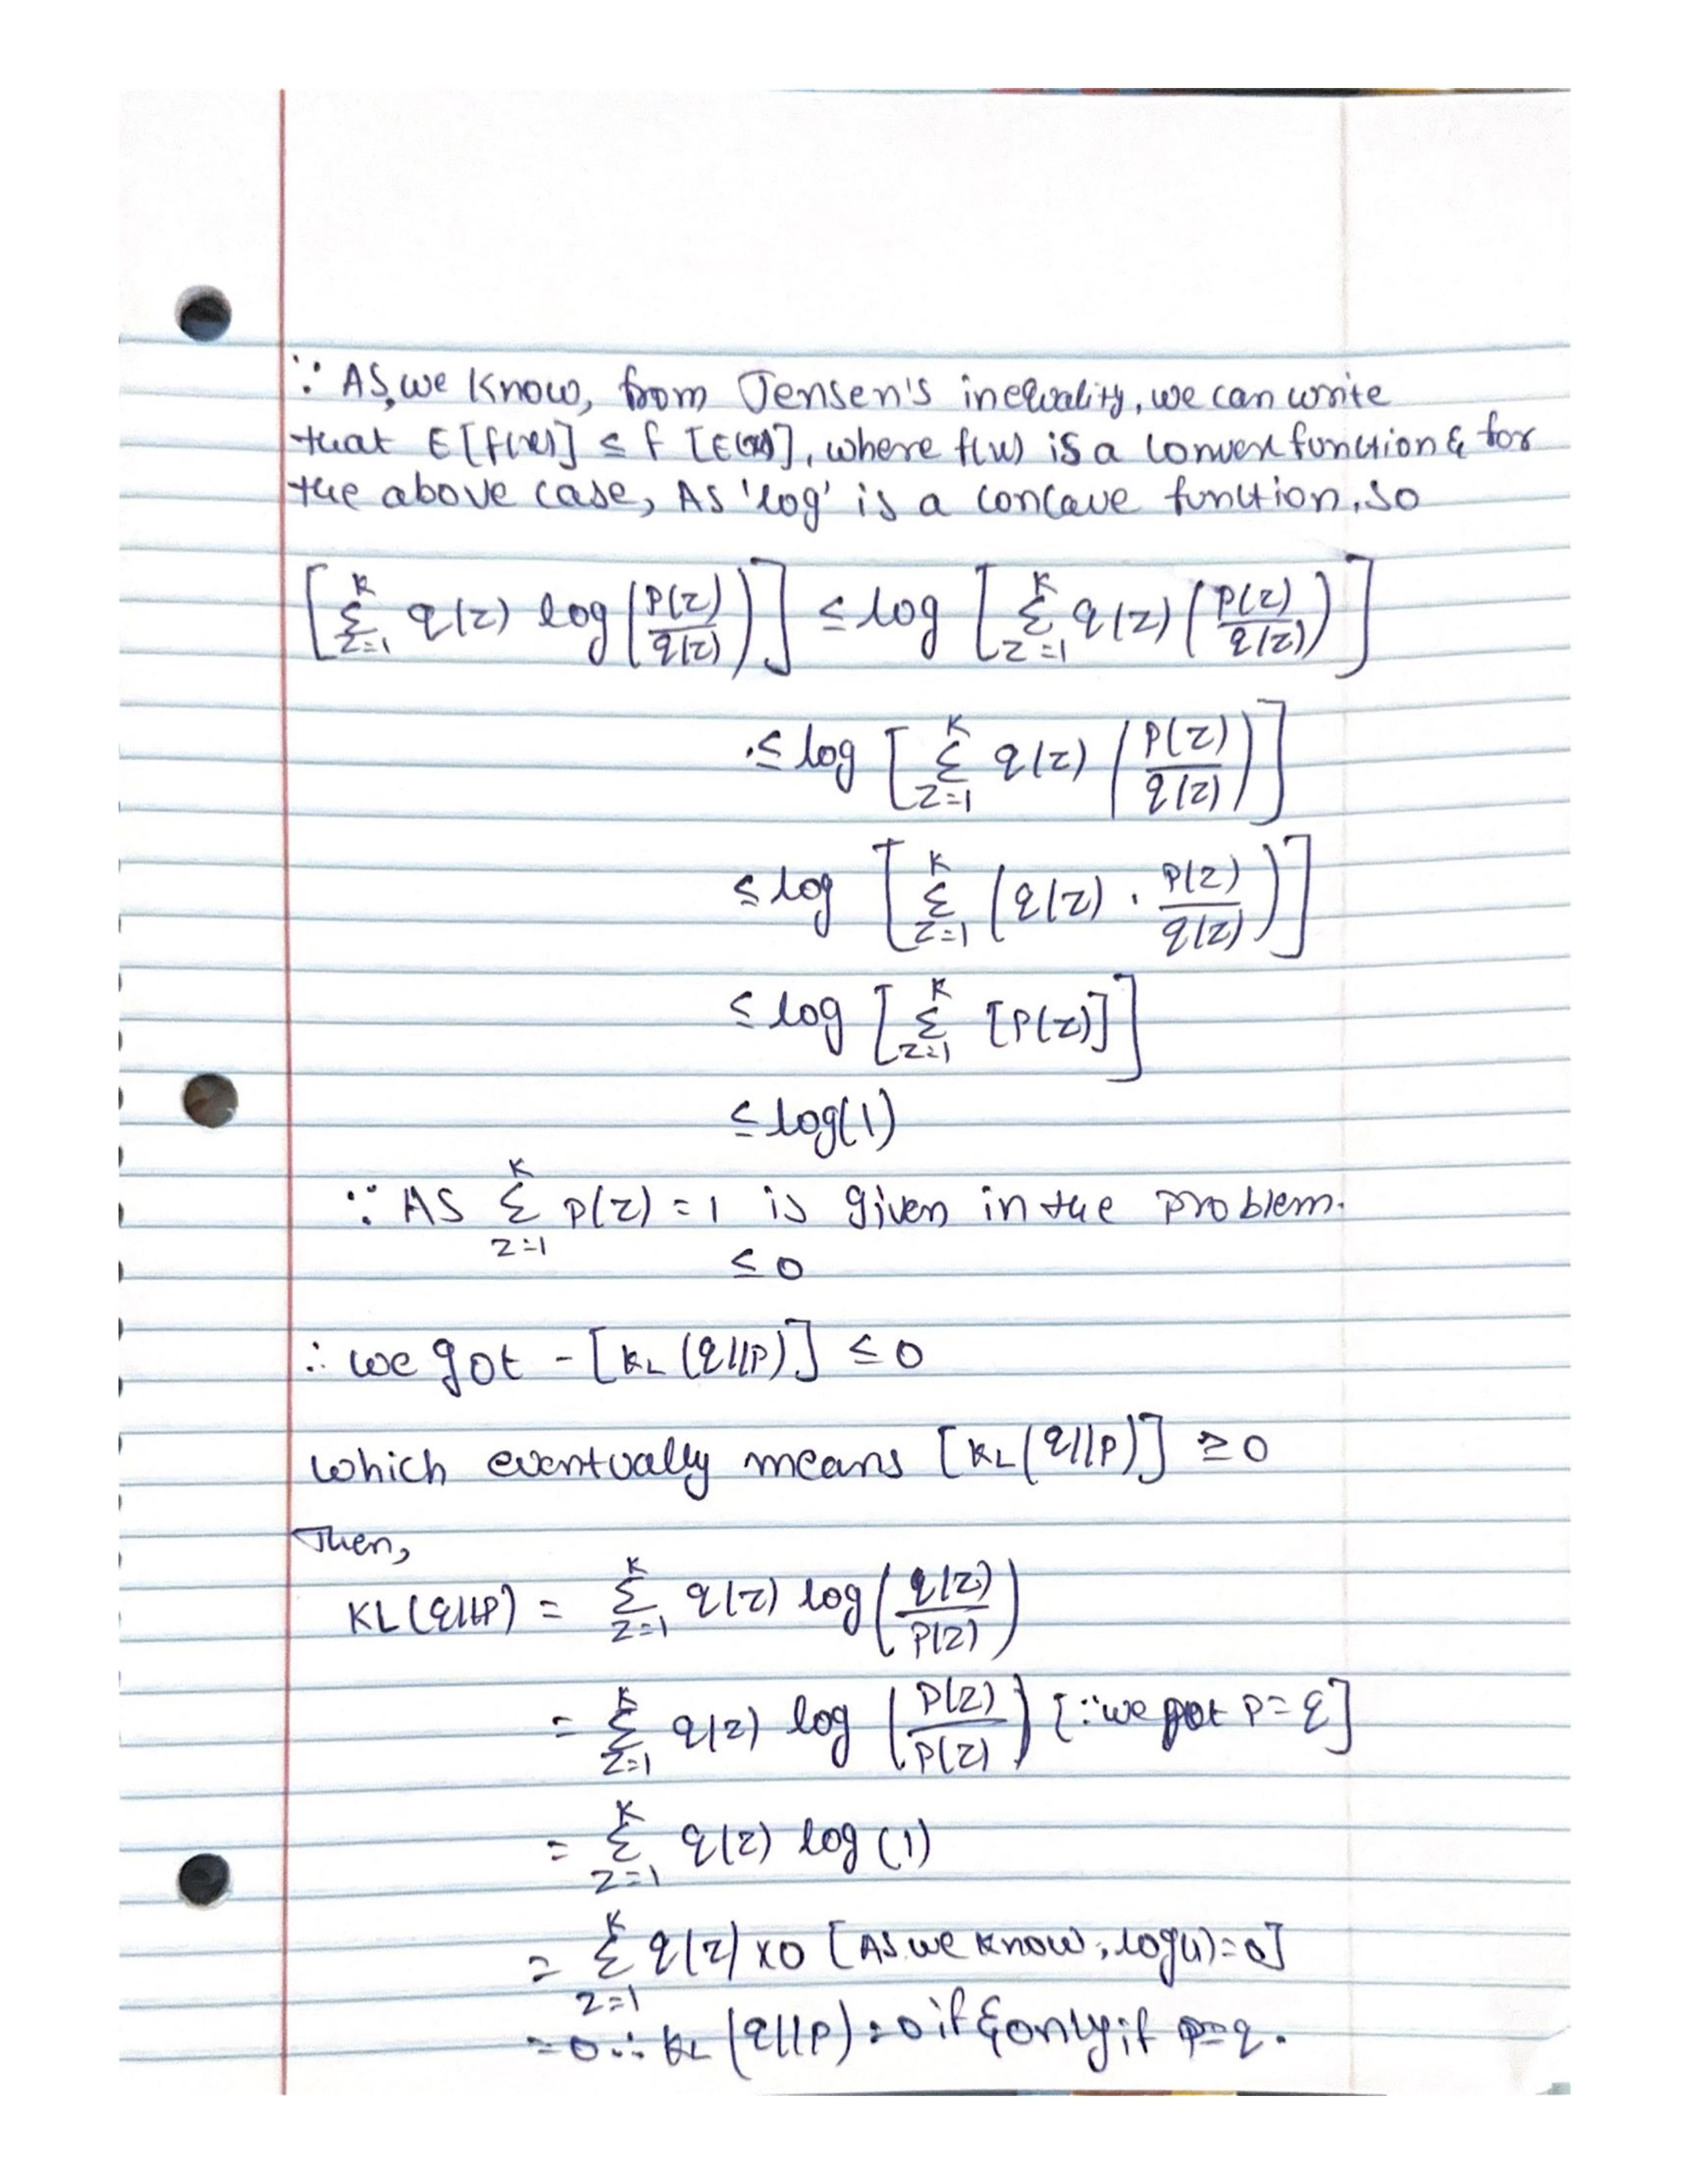



---

### Q1.3. Construct a function to calculate log likelihood (10pt)
Say you have applied EM algorithm in the Gaussian Mixture model and have found the optimal parameter $\hat{\mm\theta}=\{\hat\pi_k, \hat{\mm\mu}_k, \hat{\mm\Sigma}_k\}_{k=1}^K$. Construct a function to calculate the log likelihood $\ell(\theta)$

In [ ]:
def multivariate_normal_def(x, d, mean, cov):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(cov))) * 
            np.exp(-(np.linalg.solve(cov, x_m).T.dot(x_m)) / 2))#likelihood ℓ(θ).

In [ ]:
 def log_likelihood(X,C,Pi_opt,Mu_opt, Sigma_opt):
   N , d = X.shape
   temp = []
   likelihood = zeros( (N, C) )
   logLikelihood = zeros((N, C))
   for i in range(N):
    for k in range(C):
      distribution = multivariate_normal_def(X[i,:], d ,mean=Mu_opt[k],cov=Sigma_opt[k])
      likelihood[i,k] = distribution
    temp.append(log(likelihood[i,:].dot(Pi_opt)))
    #print("log likelihood = ", temp )
   logLikelihood = sum(temp)
   return logLikelihood
   
    



---


### Q1.4 Construct a function to calculate Bayesian information criterion (BIC) (10pt)

In Gaussian mixture models, one question is how to choose the number of the cluster $K$. This time we cannot simply use elbow method, instead we will use slightly more complicated criterion, Bayesian information criterion (BIC). 

Remember the definition of BIC is 
\begin{align}
\mr{BIC}(K) = \log p(\c{D}|\hat{\mm\theta})-\frac{d_K}{2}\log(N)
\end{align}
The first term is the log-likelihood $\ell(\hat{\mm\theta})$, $d_K$ is the number of free parameters in the model and $N$ is the number of samples. Overall, the higher BIC value, the better of the model. 

What is $d_K$ in GMM for $K$ clusters? 
Please construct a function to calculate the Bayesian information criterion. 





# Your Solution:

In [ ]:
def bic(N,dk,ll):
  bic_k=-np.log(ll)+dk*np.log(N)
  return bic_k
  




---


### Q1.5. Testing with the synthetic dataset (15pt)
Performing Gaussian mixture models over the loop for an increasing number of $K$ from 2 to 6. Note for each $K$, you should run your GMM several times with differnt random initial conditions, to make sure the parameter is not trapped in the local optimum. Plot BIC value vs. the number of the cluster $K$. From the plot, please comment what is the optimal $K$. 

(It is always a good habit to start your code for some special $K$, say $K=3$. Make sure your code produces the correct result first, then put it into the loop with different $K$. )

In [ ]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/2DGaussianMixture.csv?raw=true -O 2DGaussianMixture.csv


--2022-12-07 02:10:15--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/2DGaussianMixture.csv?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12901 (13K) [text/plain]
Saving to: ‘2DGaussianMixture.csv’

2DGaussianMixture.c 100%[===================>]  12.60K  --.-KB/s    in 0s      

2022-12-07 02:10:15 (86.5 MB/s) - ‘2DGaussianMixture.csv’ saved [12901/12901]



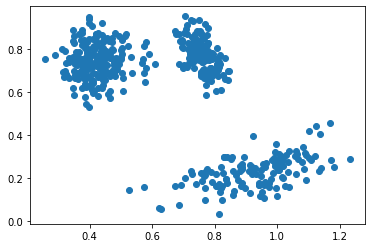

In [ ]:
X = np.genfromtxt("2DGaussianMixture.csv", delimiter=",")
X = X[1:]
X = X[:,1:]
plt.scatter(X[:,0],X[:,1])
plt.show()

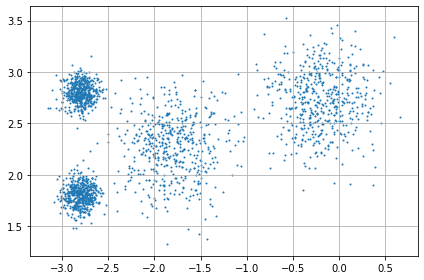

In [ ]:
from sklearn.datasets import make_blobs

def plot_clusters(X, y=None, Mu_array=0):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    if sum(Mu_array) != 0:
        plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)
        
    plt.xlabel("", fontsize=14)
    plt.ylabel("", fontsize=14, rotation=0)
    plt.grid()
    plt.tight_layout()  
    plt.show()     


if 1:
    blob_centers = np.array(
        [[ -0.2,  2.75],
         [-1.8 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8]])
    blob_std = np.array([0.3, 0.3, 0.1, 0.1])
    X2, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7) 

#figure()
plot_clusters(X2)       

K-means++ to setup initial conditions

In [ ]:
def euclidean_distance(x1, x2):
    return sqrt(sum((x1 - x2) ** 2))
    
def initialize_1(X, K):
    n_samples, n_features = X.shape
    random_sample_idxs = random.choice(n_samples, 1, replace=False)
    centroids = X[random_sample_idxs,:]

   
    for c_id in range(K - 1):
        dist = zeros(n_samples)
        for idx, sample in enumerate(X):
          distances     = [euclidean_distance(sample, point) for point in centroids]
          dist[idx]     = min(distances)

          
        next_centroid = X[argmax(dist), :]
        centroids=vstack([centroids,next_centroid])

    return centroids


In [ ]:
from scipy.stats import multivariate_normal
def initialize(X, K, centroids):
    N, d = X.shape 
    Pi = full(shape=K, fill_value=1/K) 
    weights = full(shape=(N,d), fill_value=1/K)
    Mu = [  centroids[i,:] for i in range(K) ] 
    Sigma = [ cov(X.T) for _ in range(K) ] 
    return Pi, Mu, Sigma, weights

def predict_posterior(X, K, Pi, Mu, Sigma):
    N = X.shape[0] 
    likelihood = zeros( (N, K) ) 
    for i in range(K):
        distribution = multivariate_normal(mean=Mu[i],cov=Sigma[i])
        likelihood[:,i] = distribution.pdf(X) 

    numerator = likelihood * Pi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights


def e_step(X, K, Pi, Mu, Sigma):
    weights   = predict_posterior(X, K, Pi, Mu, Sigma)
    return weights


def m_step(X, K, weights):
    Pi_update = weights.mean(axis=0)  
    Mu_update = [[] for _ in range(K)]
    Sigma_update = [[] for _ in range(K)]
    for i in range(K):
        weight_i = weights[:, [i]]
        total_weight = weight_i.sum()
        Mu_update[i]    = (X * weight_i).sum(axis=0) / total_weight
        Sigma_update[i] = cov(X.T, aweights=(weight_i/total_weight).flatten(), bias=True)  

    return Pi_update, Mu_update, Sigma_update    
    

def predict(X, K, Pi, Mu, Sigma):
   weights = predict_posterior(X, K, Pi, Mu, Sigma)
   return argmax(weights, axis=1)



In [ ]:
def GMM_fit(X, K,centroids, max_iter=200, threshold =0.0001):
  Pi, Mu, Sigma, weights = initialize(X,K,centroids)
  for j in range(max_iter):
    z = predict(X, K, Pi, Mu, Sigma)
    Mu_array = array(Mu)
    weights = e_step(X, K, Pi, Mu, Sigma)
    Pi_old  = Pi;
    Mu_old  = Mu;
    Pi, Mu, Sigma  = m_step(X, K, weights)

    distances = [ norm(Mu[i] - Mu_old[i]) for i in range(K)] 
    #print(sum(distances))
    if sum(distances) < threshold:
      #print('Number of iteration is ', j+1)
      break

  z = predict(X, K, Pi, Mu, Sigma)
  Mu_array = array(Mu)
  #plot_clusters(X, z, Mu_array)

  return z, Pi, Mu, Sigma    


In [ ]:
i=4
centroids = initialize_1(X2, i)
z, Pi, Mu, Sigma=GMM_fit(X2, i,centroids)
log_likelihood(X2,i,Pi, Mu, Sigma)
Bic = bic(4,2,2000)
print(Bic)
Bic = []
clusterNum= [2,3,4,5,6]
for i in range(2,7):
  centroids = initialize_1(X2,i)
  z, Pi, Mu, Sigma=GMM_fit(X2, i,centroids)
  Bic.append(bic(i,2,2000))
print(Bic)
print(min(Bic))
for m in range(len(Bic)):
  if(Bic[m] == min(Bic)):
    print(clusterNum[m])


-4.828313737302301
[-6.214608098422191, -5.403677882205862, -4.828313737302301, -4.382026634673881, -4.017383521085972]
-6.214608098422191
2


# Your Solution:



---


### Q1.6 Plot (5pt)
After picking the optimal, 
- Plot the data, with the most likely cluster assignment of each
data point indicated by its color. 
- Mark the mean of each Gaussian 
- Draw the
covariance ellipse for each Gaussian.

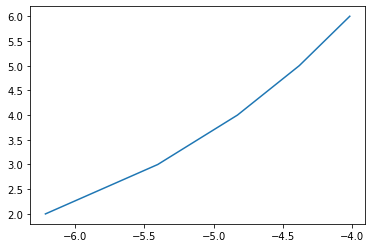

In [ ]:
plt.plot( Bic,clusterNum)



---



---
# Q2: Clustering the BBC News (50pt)
The dataset we will consider comes from the BBC (http://mlg.ucd.ie/datasets/bbc.html).
The preprocessed dataset consists of the term-document frequency of 99 vocabulary and 1791
documents chosen from 5 categories: business, entertainment, politics, sport and tech. 

After unzipping the folder, there should be four files: bbc.mtx, bbc.terms, bbc.classes,
and bbc.centers.
- **bbc.mtx**: Original term frequencies stored in a sparse matrix in Matrix Market format: each row is in the form of “termid docid frequency”.

- **bbc.terms**: List of content-bearing terms in the corpus, with each line corresponding
to a row of the sparse data matrix.

- **bbc.classes**: Assignment of documents to natural classes, with each line corresponding to a document.

- **bbc.centers**: : Cluster centers for initializing the clusters, with each line corresponding
to a center of the cluster.




In [ ]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/bbc.mtx?raw=true -O bbc.mtx
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/bbc.terms?raw=true -O bbc.terms
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/bbc.classes?raw=true -O bbc.classes
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/bbc.centers?raw=true -O bbc.centers

--2022-12-07 02:22:16--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/bbc.mtx?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56189 (55K) [text/plain]
Saving to: ‘bbc.mtx’

bbc.mtx             100%[===================>]  54.87K  --.-KB/s    in 0.01s   

2022-12-07 02:22:16 (4.72 MB/s) - ‘bbc.mtx’ saved [56189/56189]

--2022-12-07 02:22:17--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/bbc.terms?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 716 [

In [ ]:
f_mat = mmread('bbc.mtx').tocsr()			# term-document frequency matrix
classes = np.loadtxt('bbc.classes',delimiter=" ")		# The document classes
classes=classes.astype(int) # first columns is the index and second column is the true cluster of the clusters.

file = open('bbc.terms','r')
terms = file.read().splitlines()					# The terms for each row in f_mat
file.close()
centers = np.loadtxt('bbc.centers',delimiter=" ")

The term frequency vector is not a good metric because of its
biases to frequent terms. Your first task is to convert the term frequency into **tfidf**. For more information on tfidf, you may refer to https://github.com/yexf308/AdvancedMachineLearning/blob/main/Fast_KNN_kd_tree.ipynb. 

The following cell I calculate the tfidf for each doc.  

In [ ]:
# Compute tfidf
max_f = f_mat.max(axis=0).toarray()								# Max frequency of any word for each doc
tfidf = np.array(f_mat / max_f)									# Term frequency matrix
D = f_mat.shape[1]												# Number of documents in corpus
idf = np.array(np.log(D / np.sum(f_mat != 0.0, axis=1)))		# Inverse document frequency
tfidf = tfidf * idf												# tf-idf
# tfidf is now your data matrix. You will perform GMM on this dataset. 


###  GMM with shrinkage (50pt)
Run EM with $K = 5$ for 5 iterations. Using “BBC.centers” as the mean and identity as the
covariance of the initial clusters. Initialize $\mm{\pi}$ uniformly. You need to be careful when updating the covariance matrix $\mm{\Sigma}_k$ during M-step. In
particular, the MLE can be ill-conditioned because the data is sparse. As usual, to handle this
case, we can perform a shrinkage on the MLE: $\hat{\mm{\Sigma}}=(1-\lambda)\hat{\mm{\Sigma}}_{\text{MLE}}+\lambda \m{I}$, which is equivalent
to a MAP estimate of the posterior distribution with some Gaussian prior. For simplicity, in this problem, please
use $\lambda=0.2$. 

- Compare with the true cluster in `classes`, plot the classification error vs number of iterations.

- Plot the log-likelihood vs the number of iterations.

In [ ]:
def EM(data, init_means, init_covariances, init_weights, maxiter=1000, thresh=1e-4):
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)
    resp = np.zeros((num_data, num_clusters))
    ll = loglikelihood(data, weights, means, covariances)
    ll_trace = [ll]  
    for it in range(maxiter):
        if it % 5 == 0:
            print("Iteration %s" % it)
        resp = compute_responsibilities(data, weights, means, covariances)
        counts = compute_soft_counts(resp)     
        weights = compute_weights(counts)
        means = compute_means(data, resp, counts)       
        covariances = compute_covariances(data, resp, counts, means)
        ll_latest = loglikelihood(data, weights, means, covariances)
        ll_trace.append(ll_latest)
        if (ll_latest - ll) < thresh and ll_latest > -np.inf:
            break
        ll = ll_latest
    if it % 5 != 0:
        print("Iteration %s" % it)
    
    out = {'weights': weights, 'means': means, 'covs': covariances, 'loglik': ll_trace, 'resp': resp}
    print(out)

    return out

# Your Solution:



---
---


#Q3: (optional) Pandora Recruiting! 
**Pandora** is a streaming music company and they paid an army of employees to create feature vectors for each song by hand. Suppose you work at Pandora and have feature vectors $\{\m{x}^{(i)}\}_{i=1}^N\in \mb{R}^d$ for all $N$ songs in your database, and for a particular user, for some subset $\c{S}\subset \{1, \dots, N\}$, has listened to song $i\in \c{S}$ exactly $Y^{(i)}\in \{1,2,\dots\}$ times. You would like to
make a playlist for this user so you assume $Y^{(i)}$ is **Poisson distributed** with mean $\mb{E}[Y^{(i)}|\m{x}^{(i)}]=\lambda_i = \exp(\m{x}^{(i)}\m{w})$ for some weight vector $\m{w}\in \mb{R}^d$ reflecting the user's preferences. That is 
\begin{align}
p(Y^{(i)}=y |\m{x}^{(i)}, \m{w})= \frac{\lambda_i^y}{y!}\exp(-\lambda_i) =\frac{\exp(y\m{x}^{(i)}\m{w})}{y!}\exp(-\exp(\m{x}^{(i)}\m{w})) 
\end{align}
The maximum likelihood estimator is $\hat{\m w}= \arg\max_{\m{w}} \Pi_{i\in \c{S}}p(Y^{(i)} |\m{x}^{(i)}, \m{w})$. The idea is that you would then construct
a playlist out of the items $i\in \{1, \dots, N\}$ that maximize $\m{x}^{(i)}\m{w}$. 



---


### Q3.1 Solve for $\hat{\m{w}}$ 
The estimate $\hat{\m{w}}$ has no closed-form solution. Can the optimization problem be transformed into a **convex
optimization** problem?  If so, suggest a method of solving for $\hat{\m{w}}$ given $\{(\m{x}^{(i)}, Y^{(i)})\}_{i\in\c{S}}$. 

# Your Solution:



---


### Q3.2 Further improvement based on mood 
You solve for the $\hat{\m{w}}$ for this user and make a playlist for her. Weeks later you look at her listening history
and observe that sometimes she listens to a particular set of songs and skips over others, and at some
other point she listens to a different set of songs and skips over others. You have the epiphany that users
are human beings whose preferences differ with their mood (e.g., music for workouts, studying, being sad,
etc.).  You decide she has $k$ music moods and aim to make $k$ playlists, one for each mood that could be
modeled by a different weight vector $\m{w}$.  The problem is that you don’t know which observation $i\in \c{S}$ is
assigned to which mood. 

Describe how you would use the EM algorithm to make these $k$
playlists by introducing additional variables $z_{ij}$ that indicate whether song $i$ is suitable for mood $j$. Your
description should specify in math exactly what computations will be performed in the E step, exactly
what computations will be performed in the M step, how you initialize your parameters (doesn’t have to
be fancy), and what your criterion for convergence is. Make sure that all quantities are defined precisely.

# Your Solution: